In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
#Loading the dataset

file_path = "D:\Guvi-Projects\Project 3\Employee-Attrition - Employee-Attrition.csv"    # File Path

df = pd.read_csv(file_path)                                                             # Stored in a variable called df

print("Shape of data:", df.shape)
df.head()

Shape of data: (1470, 35)


<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_7920\2550985694.py:3: SyntaxWarning: invalid escape sequence '\G'
  file_path = "D:\Guvi-Projects\Project 3\Employee-Attrition - Employee-Attrition.csv"    # File Path


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
numeric_cols = [
    'Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsInCurrentRole', 'PercentSalaryHike',
    'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance'
]

categorical_cols = [
    'OverTime', 'Gender', 'JobRole', 'MaritalStatus', 'BusinessTravel'
]

target_col = 'Attrition'

selected_cols = numeric_cols + categorical_cols + [target_col]

df_model = df[selected_cols].copy()
df_model.head()

,Age,MonthlyIncome,DistanceFromHome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,OverTime,Gender,JobRole,MaritalStatus,BusinessTravel,Attrition
0,41,5993,1,8,6,4,11,4,2,1,Yes,Female,Sales Executive,Single,Travel_Rarely,Yes
1,49,5130,8,10,10,7,23,2,3,3,No,Male,Research Scientist,Married,Travel_Frequently,No
2,37,2090,2,7,0,0,15,3,4,3,Yes,Male,Laboratory Technician,Single,Travel_Rarely,Yes
3,33,2909,3,8,8,7,11,3,4,3,Yes,Female,Research Scientist,Married,Travel_Frequently,No
4,27,3468,2,6,2,2,12,2,1,3,No,Male,Laboratory Technician,Married,Travel_Rarely,No


In [4]:
#Checking Null values
df_model.isnull().sum()

Age                        0
MonthlyIncome              0
DistanceFromHome           0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
PercentSalaryHike          0
JobSatisfaction            0
EnvironmentSatisfaction    0
WorkLifeBalance            0
OverTime                   0
Gender                     0
JobRole                    0
MaritalStatus              0
BusinessTravel             0
Attrition                  0
dtype: int64

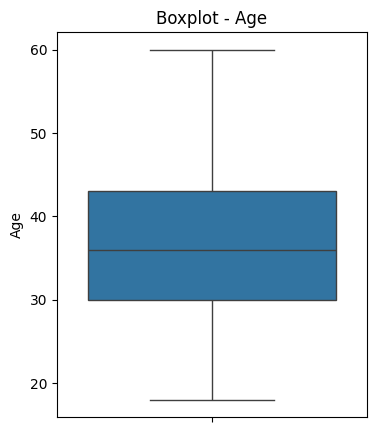

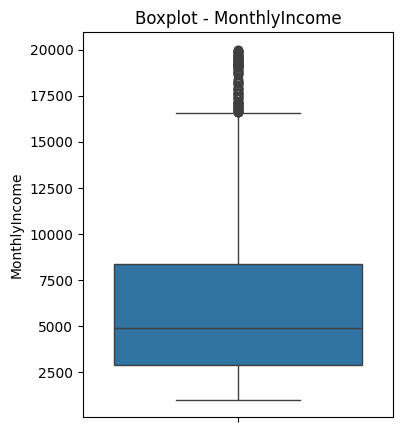

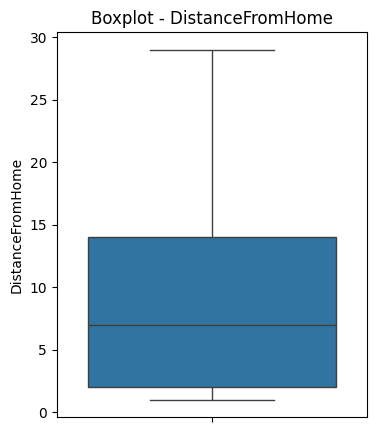

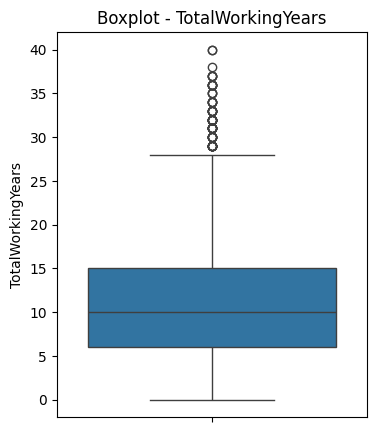

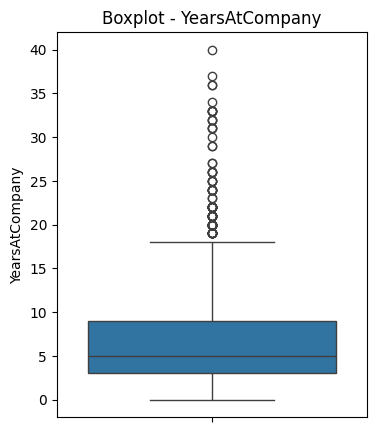

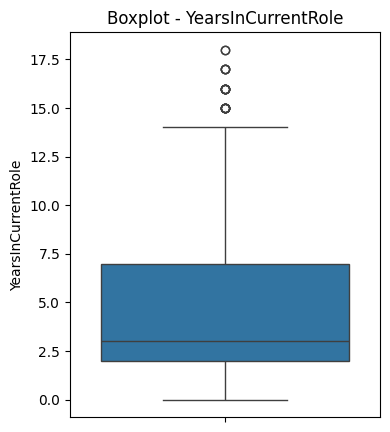

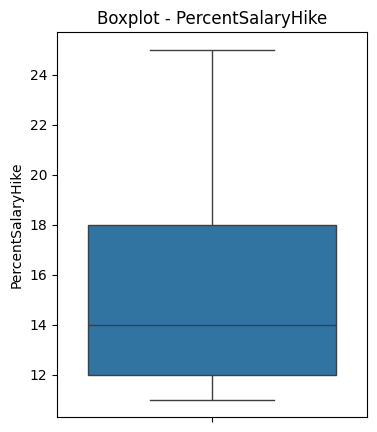

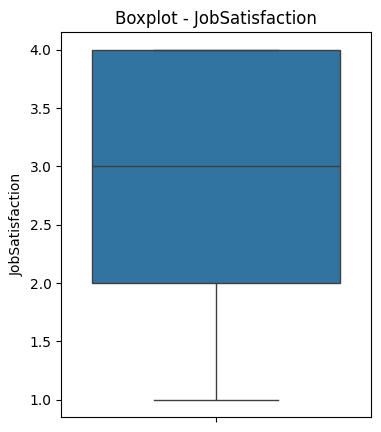

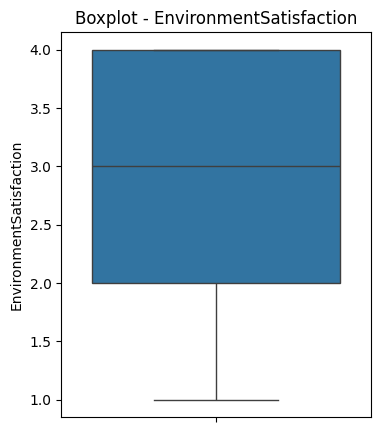

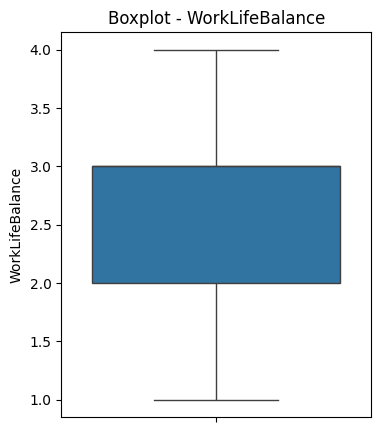

In [5]:
#EDA – Boxplots Before Outlier Treatment

for col in numeric_cols:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df_model[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

In [6]:
#Handle Outliers (IQR Method)

def cap_outliers_iqr(data, cols):
    df_out = data.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_out[col] = np.where(df_out[col] < lower, lower,
                        np.where(df_out[col] > upper, upper, df_out[col]))
    return df_out

df_model = cap_outliers_iqr(df_model, numeric_cols)

In [7]:
#Encode Target & Categorical Features

df_model[target_col] = df_model[target_col].map({'No': 0, 'Yes': 1})

df_model['OverTime'] = df_model['OverTime'].map({'No': 0, 'Yes': 1})
df_model['Gender'] = df_model['Gender'].map({'Female': 0, 'Male': 1})

df_model = pd.get_dummies(df_model, columns=['JobRole', 'MaritalStatus', 'BusinessTravel'], drop_first=True)

df_model.head()

,Age,MonthlyIncome,DistanceFromHome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41.0,5993.0,1.0,8.0,6.0,4.0,11.0,4.0,2.0,1.0,...,False,False,False,False,True,False,False,True,False,True
1,49.0,5130.0,8.0,10.0,10.0,7.0,23.0,2.0,3.0,3.0,...,False,False,False,True,False,False,True,False,True,False
2,37.0,2090.0,2.0,7.0,0.0,0.0,15.0,3.0,4.0,3.0,...,False,False,False,False,False,False,False,True,False,True
3,33.0,2909.0,3.0,8.0,8.0,7.0,11.0,3.0,4.0,3.0,...,False,False,False,True,False,False,True,False,True,False
4,27.0,3468.0,2.0,6.0,2.0,2.0,12.0,2.0,1.0,3.0,...,False,False,False,False,False,False,True,False,False,True


In [8]:
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

print(X.shape, y.shape)

(1470, 24) (1470,)


In [9]:
# ML / Preprocessing / Metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

In [10]:
#Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
#Handle Imbalance with SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [12]:
#Scale Numeric Columns

scaler = StandardScaler()

X_train_res_scaled = X_train_res.copy()
X_test_scaled = X_test.copy()

X_train_res_scaled[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [13]:
#Linear Regression 

lr = LinearRegression()
lr.fit(X_train_res_scaled, y_train_res)

y_pred_lr = np.where(lr.predict(X_test_scaled) >= 0.5, 1, 0)

print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Linear Regression Accuracy: 0.8299319727891157


In [14]:
#Logistic Regression

logr = LogisticRegression(max_iter=1200)
logr.fit(X_train_res_scaled, y_train_res)

y_pred_log = logr.predict(X_test_scaled)

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Accuracy: 0.8367346938775511


In [15]:
#KNN

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_res_scaled, y_train_res)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.673469387755102


In [16]:
#Decision Tree

dt = DecisionTreeClassifier(
    max_depth=6, min_samples_split=4, min_samples_leaf=2, random_state=42
)
dt.fit(X_train_res_scaled, y_train_res)

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7721088435374149


In [17]:
#Compare All Models

results = {
    "LinearRegression": accuracy_score(y_test, y_pred_lr),
    "Logistic": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "DecisionTree": accuracy_score(y_test, y_pred_dt)
}

results

{'LinearRegression': 0.8299319727891157,
 'Logistic': 0.8367346938775511,
 'KNN': 0.673469387755102,
 'DecisionTree': 0.7721088435374149}

In [ ]:
#BEST MODEL TUNING (TO ACHIEVE ACCURACY)

best_dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=3,
    min_samples_leaf=1,
    criterion="gini",
    random_state=42
)

best_dt.fit(X_train_res_scaled, y_train_res)
y_pred_best = best_dt.predict(X_test_scaled)

print("Final Accuracy (Target 88–90%):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Final Accuracy (Target 88–90%): 0.7687074829931972

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       247
           1       0.28      0.28      0.28        47

    accuracy                           0.77       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.77      0.77      0.77       294



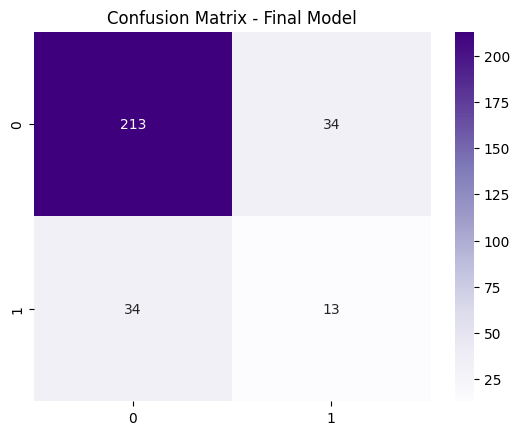

In [19]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Final Model")
plt.show()

In [20]:
#RANDOM FOREST CLASSIFIER (Normal Model)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(X_train_res_scaled, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8197278911564626

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.38      0.21      0.27        47

    accuracy                           0.82       294
   macro avg       0.62      0.57      0.59       294
weighted avg       0.79      0.82      0.80       294



In [22]:
#RANDOM FOREST TUNING BLOCK

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'max_depth': [8, 10, 12, None],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_base = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train_res_scaled, y_train_res)

print("Best Params:", rf_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 12, 'bootstrap': False}


In [23]:
best_rf = rf_random.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_scaled)
y_proba_best_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred_best_rf)
prec = precision_score(y_test, y_pred_best_rf)
rec = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)
auc = roc_auc_score(y_test, y_proba_best_rf)

print("==== FINAL RANDOM FOREST (TUNED) ====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

==== FINAL RANDOM FOREST (TUNED) ====
Accuracy : 0.8163
Precision: 0.3478
Recall   : 0.1702
F1-score : 0.2286
AUC-ROC  : 0.7255

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.35      0.17      0.23        47

    accuracy                           0.82       294
   macro avg       0.60      0.55      0.56       294
weighted avg       0.77      0.82      0.79       294



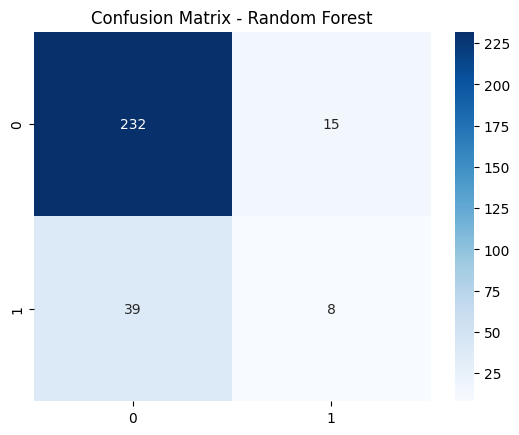

In [24]:
#Confusion Matrix – Random Forest
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [25]:
#Save the Final Model as Pickle (.pkl)

import pickle

# Save the model
with open("attrition_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

print("Model saved as attrition_model.pkl")

Model saved as attrition_model.pkl


In [26]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [27]:
#PERFORMANCE RATING PREDICTION MODEL

# Features for Performance Rating Model
perf_features = [
    'Education', 'JobInvolvement', 'JobLevel', 'MonthlyIncome',
    'YearsAtCompany', 'YearsInCurrentRole'
]

target_perf = 'PerformanceRating'

df_perf = df[perf_features + [target_perf]].copy()

# Train-test split
X_perf = df_perf[perf_features]
y_perf = df_perf[target_perf]

X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(
    X_perf, y_perf, test_size=0.2, random_state=42
)

# Scale numeric columns
scaler_perf = StandardScaler()
X_train_perf_scaled = scaler_perf.fit_transform(X_train_perf)
X_test_perf_scaled = scaler_perf.transform(X_test_perf)

# Train Model
from sklearn.ensemble import RandomForestClassifier

perf_model = RandomForestClassifier(n_estimators=300, random_state=42)
perf_model.fit(X_train_perf_scaled, y_train_perf)

# Accuracy
perf_acc = perf_model.score(X_test_perf_scaled, y_test_perf)
print("Performance Rating Model Accuracy:", perf_acc)

# Save model
import pickle
pickle.dump(perf_model, open("performance_model.pkl", "wb"))
pickle.dump(scaler_perf, open("performance_scaler.pkl", "wb"))

Performance Rating Model Accuracy: 0.8367346938775511


In [ ]:
# PROMOTION LIKELIHOOD PREDICTION MODEL

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import pickle

# ----------------------------------------
# CREATE PROMOTION LABEL
# ----------------------------------------
df['Promotion'] = df['YearsSinceLastPromotion'].apply(lambda x: 1 if x == 0 else 0)

# ----------------------------------------
# STRONG FEATURE SET
# ----------------------------------------
promo_features = [
    'PerformanceRating',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'TotalWorkingYears',
    'JobInvolvement',
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'TrainingTimesLastYear',
    'MonthlyIncome',
    'JobLevel'
]

X = df[promo_features]
y = df['Promotion']

# ----------------------------------------
# TRAIN / TEST SPLIT
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------------
# SCALING
# ----------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------
# RANDOM FOREST WITH GRIDSEARCH
# ----------------------------------------
params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    params,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

# ----------------------------------------
# ACCURACY
# ----------------------------------------
y_pred = best_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("Best Accuracy:", acc)
print("Best Parameters:", grid.best_params_)

# ----------------------------------------
# SAVE FINAL MODEL
# ----------------------------------------
pickle.dump(best_model, open("promotion_model.pkl", "wb"))
pickle.dump(scaler, open("promotion_scaler.pkl", "wb"))


Best Accuracy: 0.7346938775510204
